In [1]:
import numpy as np
import pandas as pd
#import training set
Train_df = pd.read_csv('/Users/weisihan/Downloads/we_data/mytrainingset.csv')
#import validation set
Valid_df = pd.read_csv('/Users/weisihan/Downloads/we_data/valid_newfeature.csv')

In [2]:
Train_df['slotheight']=Train_df['slotheight']/10
Train_df['slotwidth']=Train_df['slotwidth']/100
Train_df['slotprice']=Train_df['slotprice']/100

In [3]:
Train_df.describe()

,click,slotwidth,slotheight,slotprice,android,ios,linux,mac,other,windows,...,slotformat_Na,advertiser_1458,advertiser_2259,advertiser_2261,advertiser_2821,advertiser_2997,advertiser_3358,advertiser_3386,advertiser_3427,advertiser_3476
count,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000,...,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000,244712.000000
mean,0.007327,5.762778,18.878612,0.267696,0.027322,0.000163,0.000707,0.020281,0.000752,0.950775,...,0.207023,0.201232,0.054276,0.044824,0.086996,0.020927,0.109177,0.189112,0.165186,0.128269
std,0.085284,3.215620,13.144864,0.371542,0.163020,0.012784,0.026579,0.140960,0.027411,0.216338,...,0.405173,0.400922,0.226562,0.206918,0.281830,0.143139,0.311862,0.391598,0.371349,0.334390
min,0.000000,1.200000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.360000,9.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,9.600000,25.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,10.000000,60.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# columns of without click
cols=list(Train_df.columns)[1:]

In [5]:
train = Train_df
train_y = train['click']
train_x = train[cols]

In [6]:
train_x=train_x.values
train_y=train_y.values

In [25]:
#23:33
#train Factorised Machine model
from tffm import TFFMClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score




X = train_x
y = train_y

X_te = Valid_df[cols]
y_te = Valid_df['click']

X_te['slotheight']=X_te['slotheight']/10
X_te['slotwidth']=X_te['slotwidth']/100
X_te['slotprice']=X_te['slotprice']/100

X_te=X_te.values
y_te=y_te.values


# train the default model
model = TFFMClassifier(
    order=4,
    rank=12,
    optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
    n_epochs=80,
    batch_size=-1,
    init_std=0.001,
    input_type='dense'
)

model.fit(X, y, show_progress=True)

test_predictions = model.predict_proba(X_te)
test_predictions_class = model.predict(X_te)

acc = accuracy_score(y_te, test_predictions_class)
print('model: {}'.format(model.__str__()))
print("the accuracy is: {0:6f}".format(acc))
print ("the AUC for XGBoost is: {0:6f}".format(roc_auc_score(y_te, test_predictions[:,1])))
print("==================================")





/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

model: TFFMClassifier()
the accuracy is: 0.834693
the AUC for XGBoost is: 0.850780


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score



acc = accuracy_score(y_te, test_predictions_class)
print ("the AUC for FM is: {0:6f}".format(roc_auc_score(y_te, test_predictions[:,1])))

the AUC for FM is: 0.858078


In [15]:
acc

0.99885169038414079

In [224]:
#test the default model
X_te = Valid_df[cols]
y_te = Valid_df['click']

X_te['slotheight']=X_te['slotheight']/10
X_te['slotwidth']=X_te['slotwidth']/100
X_te['slotprice']=X_te['slotprice']/100

X_te=X_te.values
y_te=y_te.values

test_predictions = model.predict_proba(X_te)
test_predictions_class = model.predict(X_te)

acc = accuracy_score(y_te, predictions)
print('model: {}'.format(model.__str__()))


/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

model: TFFMClassifier()


In [225]:
test_result = pd.DataFrame(columns=['click', 'click_pred_per', 'click_pred_class'])  
test_result['click']= Valid_df['click'].copy()
test_result['click_pred_per'] = test_predictions[:,1]
test_result['click_pred_class'] = test_predictions_class
test_result.head()

,click,click_pred_per,click_pred_class
0,0,0.000056,0
1,0,0.000502,0
2,0,0.001171,0
3,0,0.000340,0
4,0,0.003991,0


In [226]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


y_test = test_result['click']
y_pred_class = test_result['click_pred_class']

print(confusion_matrix(y_test, y_pred_class))

confusion = confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)

#准确率、识别率（Classification Accuracy）：分类器正确分类的比例
#print ((TP+TN) / float(TP+TN+FN+FP))
print ("Accuracy: %.6f%%" % (accuracy_score(y_test, y_pred_class)* 100.0) )

#灵敏性（Sensitivity），也称为真正例识别率、召回率（Recall）：正确识别的正例数据在实际正例数据中的百分比
#print (TP / float(TP+FN))
#recall = metrics.recall_score(y_test, y_pred_class)
print ("Recall: %.6f%%" % (accuracy_score(y_test, y_pred_class)* 100.0))

#特效性（Specificity），也称为真负例率：正确识别的负例数据在实际负例数据中的百分比
print ("Specificity: %.6f%%" % (TN / float(TN+FP)* 100.0))

#假阳率（False Positive Rate）：实际值是负例数据，预测错误的百分比
#print (FP / float(TN+FP))
specificity = TN / float(TN+FP)
print ("False Positive Rate: %.6f%%" %((1 - specificity)*100.0))

#精度（Precision）：看做精确性的度量，即标记为正类的数据实际为正例的百分比
#print (TP / float(TP+FP))
precision = precision_score(y_test, y_pred_class)
print ("Precision: %.6f%%" %(precision*100.0))

#F1（平衡F分数）：精确率和召回率的调和平均数
#print (TP / float(TP+FP))
f1 = f1_score(y_test, y_pred_class)
print ("F1 score: %.6f%%" %(f1*100.0))

[[303537    186]
 [   141     61]]
TP: 61
TN: 303537
FP: 186
FN: 141
Accuracy: 99.892408%
Recall: 99.892408%
Specificity: 99.938760%
False Positive Rate: 0.061240%
Precision: 24.696356%
F1 score: 27.171492%


In [11]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt


# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_ROC_curve(data, prediction):
    """
    Function to plot the ROC curve with AUC.
    """

    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(data, prediction)
    roc_auc = roc_auc_score(data, prediction)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    #plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC curve for CTR')
    plt.grid(True)
    plt.legend(loc="lower right")
    
    return





the AUC for XGBoost is: 0.847619


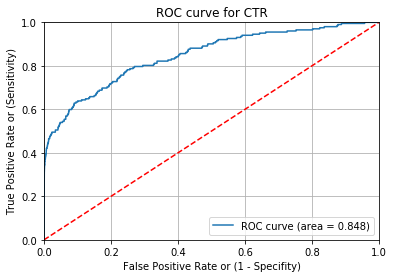

In [228]:
plot_ROC_curve(test_result['click'], test_result['click_pred_per'])
#tffm的auc
print ("the AUC for XGBoost is: {0:6f}".format(roc_auc_score(test_result['click'], test_result['click_pred_per'])))

## Different optimizers

Populating the interactive namespace from numpy and matplotlib


/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
100%|██████████| 5/5 [00:15<00:00,  3.10s/epoch]


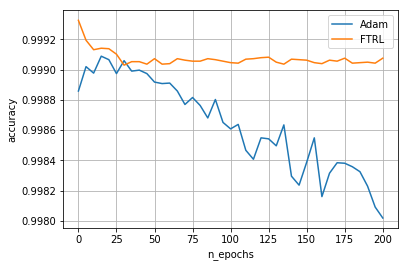

In [239]:
%pylab inline
for optim, title in [(tf.train.AdamOptimizer(learning_rate=0.001), 'Adam'), 
              (tf.train.FtrlOptimizer(0.01, l1_regularization_strength=0.01), 'FTRL')]:
    acc = []
    model = TFFMClassifier(
        order=3, 
        rank=10, 
        optimizer=optim,
        batch_size=1024,
        init_std=0.001,
        reg=0.1,
        input_type='dense',
    )
    n_epochs = 5
    anchor_epochs = range(0, 200+1, n_epochs)
    for _ in anchor_epochs:
        # score result every 5 epochs
        model.fit(train_x, train_y, n_epochs=n_epochs, show_progress=True)
        predictions = model.predict(X_te)
        acc.append(accuracy_score(y_te, predictions))
    plot(anchor_epochs, acc, label=title)
    model.destroy()
xlabel('n_epochs')
ylabel('accuracy')
legend()
grid()

Populating the interactive namespace from numpy and matplotlib


/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
100%|██████████| 5/5 [00:13<00:00,  2.78s/epoch]
/Users/weisihan/Downloads/tffm-master/tffm/utils.py:195: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
100%|██████████| 5/5 [00:14<00:00,  2.86s/epoch]


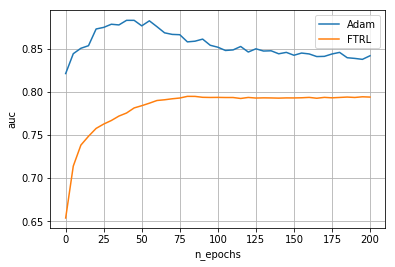

In [246]:
%pylab inline
for optim, title in [(tf.train.AdamOptimizer(learning_rate=0.001), 'Adam'), 
              (tf.train.FtrlOptimizer(0.01, l1_regularization_strength=0.01), 'FTRL')]:
    acc = []
    model = TFFMClassifier(
        order=3, 
        rank=10, 
        optimizer=optim,
        batch_size=1024,
        init_std=0.001,
        reg=0.1,
        input_type='dense',
    )
    n_epochs = 5
    anchor_epochs = range(0, 200+1, n_epochs)
    for _ in anchor_epochs:
        # score result every 5 epochs
        model.fit(train_x, train_y, n_epochs=n_epochs, show_progress=True)
        predictions = model.predict_proba(X_te)
        acc.append(roc_auc_score(y_te, predictions[:,1]))
    plot(anchor_epochs, acc, label=title)
    model.destroy()
xlabel('n_epochs')
ylabel('auc')
legend()
grid()

In [ ]:
print ("the AUC for XGBoost is: {0:6f}".format(roc_auc_score(test_result['click'], test_result['click_pred_per'])))



Populating the interactive namespace from numpy and matplotlib


/Users/weisihan/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
100%|██████████| 10/10 [00:52<00:00,  5.29s/epoch]
/Users/weisihan/Downloads/tffm-master/tffm/utils.py:195: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
100%|██████████| 10/10 [00:50<00:00,  5.05s/epoch]


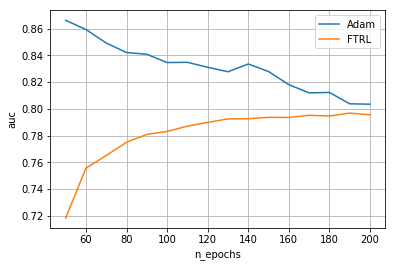

In [12]:
%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
for optim, title in [(tf.train.AdamOptimizer(learning_rate=0.001), 'Adam'), 
              (tf.train.FtrlOptimizer(0.01, l1_regularization_strength=0.01), 'FTRL')]:
    acc = []
    model = TFFMClassifier(
        order=5, 
        rank=12, 
        optimizer=optim,
        batch_size=1024,
        init_std=0.001,
        reg=0.1,
        input_type='dense',
    )
    n_epochs = 10
    anchor_epochs = range(50, 200+1, n_epochs)
    for _ in anchor_epochs:
        # score result every 5 epochs
        model.fit(train_x, train_y, n_epochs=n_epochs, show_progress=True)
        predictions = model.predict_proba(X_te)
        acc.append(roc_auc_score(y_te, predictions[:,1]))
    plot(anchor_epochs, acc, label=title)
    model.destroy()
xlabel('n_epochs')
ylabel('auc')
legend()
grid()